In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('kc_house_data_preprocessed.csv')
data.head()

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,2014,10,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,2014,12,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2015,2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,2014,12,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,2015,2,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0


In [3]:
data.describe(include='all').round(2)

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,2014.32,6.57,3.37,2.11,2079.90,15106.97,1.49,0.01,3.41,7.66,1788.39,291.51,1971.01,84.40,47.56,-122.21,1986.55,12768.46,540088.14
std,0.47,3.12,0.93,0.77,918.44,41420.51,0.54,0.09,0.65,1.18,828.09,442.58,29.37,401.68,0.14,0.14,685.39,27304.18,367127.20
min,2014.00,1.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,47.16,-122.52,399.00,651.00,75000.00
25%,2014.00,4.00,3.00,1.75,1427.00,5040.00,1.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,47.47,-122.33,1490.00,5100.00,321950.00
50%,2014.00,6.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,47.57,-122.23,1840.00,7620.00,450000.00
75%,2015.00,9.00,4.00,2.50,2550.00,10688.00,2.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,47.68,-122.12,2360.00,10083.00,645000.00
max,2015.00,12.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,47.78,-121.32,6210.00,871200.00,7700000.00


### Removing outliers

In [4]:
data_preprocessing = data.copy()

In [5]:
data_preprocessing = data_preprocessing.drop(['yr_renovated'], axis=1)

In [6]:
q = data_preprocessing['bedrooms'].quantile(0.99)
data_1 = data_preprocessing[data_preprocessing['bedrooms']<q]

In [7]:
q = data_1['bathrooms'].quantile(0.99)
data_2 = data_1[data_1['bathrooms']<q]

In [8]:
q = data_2['sqft_living'].quantile(0.99)
data_3 = data_2[data_2['sqft_living']<q]

In [9]:
q = data_3['sqft_lot'].quantile(0.95)
data_4 = data_3[data_3['sqft_lot']<q]

In [10]:
q = data_4['sqft_above'].quantile(0.99)
data_5 = data_4[data_4['sqft_above']<q]

In [11]:
q = data_5['sqft_basement'].quantile(0.99)
data_6 = data_5[data_5['sqft_basement']<q]

In [12]:
q = data_6['sqft_living15'].quantile(0.99)
data_7 = data_6[data_6['sqft_living15']<q]

In [13]:
q = data_7['sqft_lot15'].quantile(0.95)
data_8 = data_7[data_7['sqft_lot15']<q]

In [14]:
q = data_8['price'].quantile(0.99)
data_9 = data_8[data_8['price']<q]

In [15]:
data_cleaned = data_9.reset_index(drop=True)

In [16]:
data_cleaned.describe().round(2)

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,price
count,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00,17967.00
mean,2014.33,6.57,3.26,2.00,1873.23,7398.19,1.47,0.00,3.41,7.45,1621.20,252.03,1969.67,47.56,-122.23,1845.02,7047.91,468995.96
std,0.47,3.12,0.81,0.67,674.97,4176.17,0.54,0.05,0.65,0.96,640.19,374.83,29.99,0.14,0.13,546.56,3079.81,217772.02
min,2014.00,1.00,0.00,0.00,370.00,520.00,1.00,0.00,1.00,3.00,370.00,0.00,1900.00,47.16,-122.50,620.00,651.00,78000.00
25%,2014.00,4.00,3.00,1.50,1360.00,4800.00,1.00,0.00,3.00,7.00,1140.00,0.00,1950.00,47.47,-122.34,1440.00,4920.00,307000.00
50%,2014.00,6.00,3.00,2.00,1790.00,7140.00,1.00,0.00,3.00,7.00,1460.00,0.00,1971.00,47.57,-122.27,1750.00,7200.00,425000.00
75%,2015.00,9.00,4.00,2.50,2310.00,9221.00,2.00,0.00,4.00,8.00,1980.00,500.00,1997.00,47.68,-122.15,2180.00,8890.00,580000.00
max,2015.00,12.00,5.00,3.75,4390.00,40752.00,3.50,1.00,5.00,11.00,3780.00,1480.00,2015.00,47.78,-121.32,3610.00,16943.00,1399000.00


### Checking the linearity

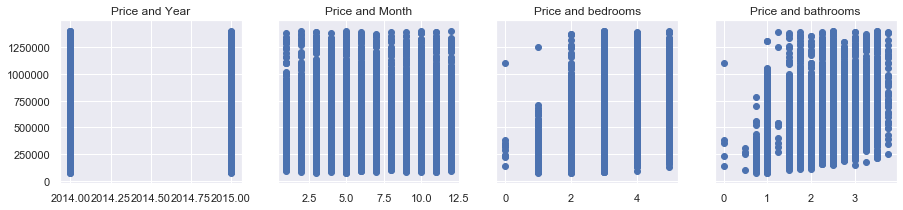

In [17]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['year'], data_cleaned['price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['month'], data_cleaned['price'])
ax2.set_title('Price and Month')
ax3.scatter(data_cleaned['bedrooms'], data_cleaned['price'])
ax3.set_title('Price and bedrooms')
ax4.scatter(data_cleaned['bathrooms'], data_cleaned['price'])
ax4.set_title('Price and bathrooms')

plt.show()

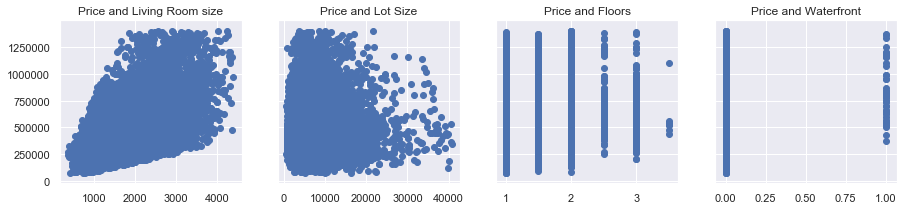

In [18]:
f, (ax5, ax6, ax7, ax8) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax5.scatter(data_cleaned['sqft_living'], data_cleaned['price'])
ax5.set_title('Price and Living Room size')
ax6.scatter(data_cleaned['sqft_lot'], data_cleaned['price'])
ax6.set_title('Price and Lot Size')
ax7.scatter(data_cleaned['floors'], data_cleaned['price'])
ax7.set_title('Price and Floors')
ax8.scatter(data_cleaned['waterfront'], data_cleaned['price'])
ax8.set_title('Price and Waterfront')

plt.show()

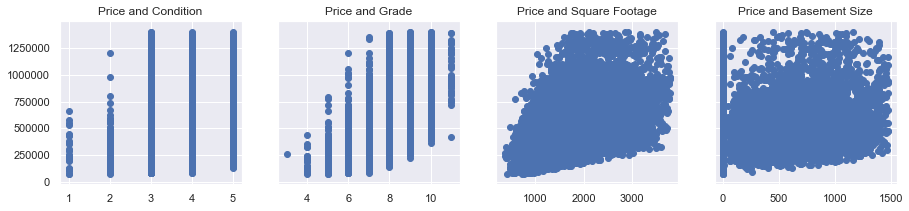

In [19]:
f, (ax9, ax10, ax11, ax12) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax9.scatter(data_cleaned['condition'], data_cleaned['price'])
ax9.set_title('Price and Condition')
ax10.scatter(data_cleaned['grade'], data_cleaned['price'])
ax10.set_title('Price and Grade')
ax11.scatter(data_cleaned['sqft_above'], data_cleaned['price'])
ax11.set_title('Price and Square Footage')
ax12.scatter(data_cleaned['sqft_basement'], data_cleaned['price'])
ax12.set_title('Price and Basement Size')

plt.show()

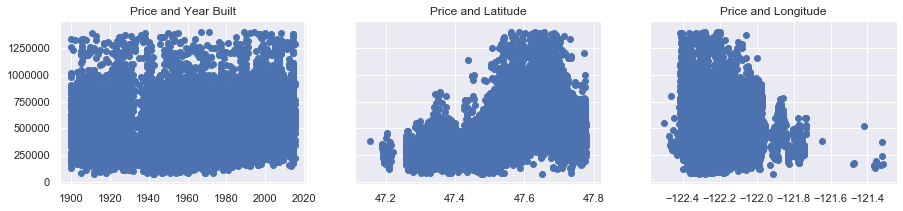

In [20]:
f, (ax13, ax14, ax15) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax13.scatter(data_cleaned['yr_built'], data_cleaned['price'])
ax13.set_title('Price and Year Built')
ax14.scatter(data_cleaned['lat'], data_cleaned['price'])
ax14.set_title('Price and Latitude')
ax15.scatter(data_cleaned['long'], data_cleaned['price'])
ax15.set_title('Price and Longitude')

plt.show()

### Relaxing the assumptions

In [21]:
log_price = np.log(data_cleaned['price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,price,log_price
0,2014,10,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,221900.0,12.309982
1,2014,12,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,538000.0,13.195614
2,2015,2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,180000.0,12.100712
3,2014,12,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,604000.0,13.311329
4,2015,2,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,510000.0,13.142166


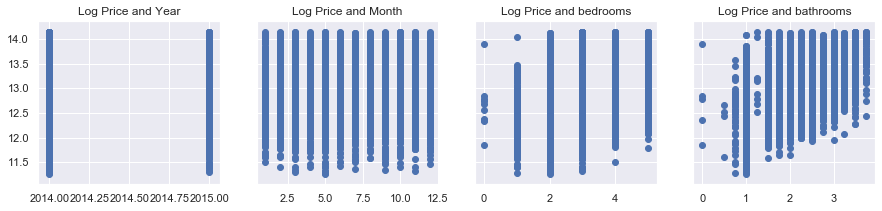

In [22]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['month'], data_cleaned['log_price'])
ax2.set_title('Log Price and Month')
ax3.scatter(data_cleaned['bedrooms'], data_cleaned['log_price'])
ax3.set_title('Log Price and bedrooms')
ax4.scatter(data_cleaned['bathrooms'], data_cleaned['log_price'])
ax4.set_title('Log Price and bathrooms')

plt.show()

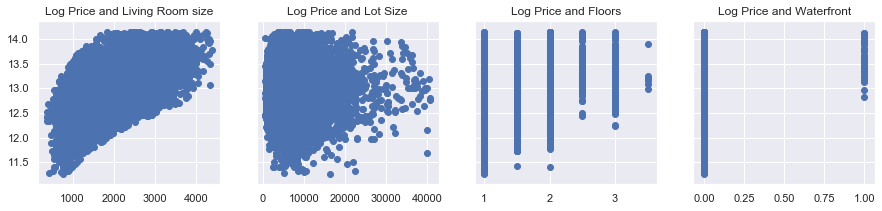

In [23]:
f, (ax5, ax6, ax7, ax8) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax5.scatter(data_cleaned['sqft_living'], data_cleaned['log_price'])
ax5.set_title('Log Price and Living Room size')
ax6.scatter(data_cleaned['sqft_lot'], data_cleaned['log_price'])
ax6.set_title('Log Price and Lot Size')
ax7.scatter(data_cleaned['floors'], data_cleaned['log_price'])
ax7.set_title('Log Price and Floors')
ax8.scatter(data_cleaned['waterfront'], data_cleaned['log_price'])
ax8.set_title('Log Price and Waterfront')

plt.show()

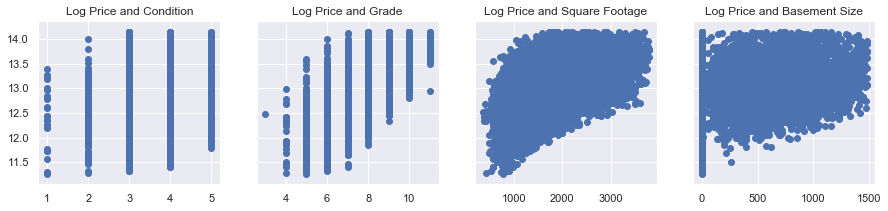

In [24]:
f, (ax9, ax10, ax11, ax12) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax9.scatter(data_cleaned['condition'], data_cleaned['log_price'])
ax9.set_title('Log Price and Condition')
ax10.scatter(data_cleaned['grade'], data_cleaned['log_price'])
ax10.set_title('Log Price and Grade')
ax11.scatter(data_cleaned['sqft_above'], data_cleaned['log_price'])
ax11.set_title('Log Price and Square Footage')
ax12.scatter(data_cleaned['sqft_basement'], data_cleaned['log_price'])
ax12.set_title('Log Price and Basement Size')

plt.show()

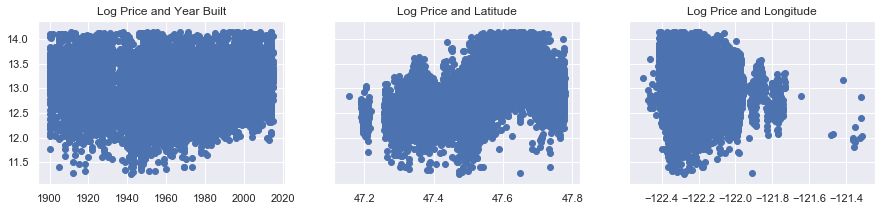

In [25]:
f, (ax13, ax14, ax15) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax13.scatter(data_cleaned['yr_built'], data_cleaned['log_price'])
ax13.set_title('Log Price and Year Built')
ax14.scatter(data_cleaned['lat'], data_cleaned['log_price'])
ax14.set_title('Log Price and Latitude')
ax15.scatter(data_cleaned['long'], data_cleaned['log_price'])
ax15.set_title('Log Price and Longitude')

plt.show()

In [26]:
data_cleaned = data_cleaned.drop(['price'], axis=1)

### Checking for multicollinearity

In [27]:
data_cleaned.columns.values

array(['year', 'month', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price'], dtype=object)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['year', 'month', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [29]:
vif.round(2)

,VIF,Features
0,1416732.38,year
1,5.71,month
2,29.19,bedrooms
3,29.09,bathrooms
4,inf,sqft_living
5,11.65,sqft_lot
6,21.56,floors
7,1.02,waterfront
8,34.34,condition
9,157.40,grade


In [30]:
variables = data_cleaned[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_living15', 'sqft_lot15']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [31]:
vif.round(2)

,VIF,Features
0,23.12,bedrooms
1,19.82,bathrooms
2,11.49,sqft_lot
3,11.62,floors
4,1.01,waterfront
5,13.92,condition
6,19.58,sqft_living15
7,18.54,sqft_lot15


In [32]:
data_vif = data_cleaned[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_living15', 'sqft_lot15', 'log_price']]

In [33]:
data_vif.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_living15,sqft_lot15,log_price
0,3,1.00,5650,1.0,0,3,1340,5650,12.309982
1,3,2.25,7242,2.0,0,3,1690,7639,13.195614
2,2,1.00,10000,1.0,0,3,2720,8062,12.100712
3,4,3.00,5000,1.0,0,5,1360,5000,13.311329
4,3,2.00,8080,1.0,0,3,1800,7503,13.142166


### Linear regression model

In [36]:
x = data_vif.drop(['log_price'], axis=1)
y = data_vif['log_price']

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
x_scaled = scaler.transform(x)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=18)

In [41]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_hat = reg.predict(x_train)

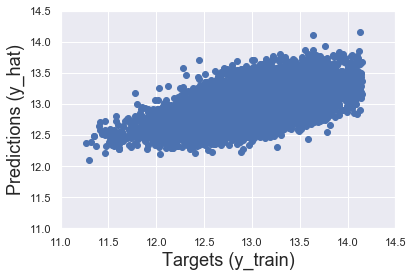

In [51]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(11,14.5)
plt.ylim(11,14.5)


plt.show()

Text(0.5, 1.0, 'Residuals PDF')

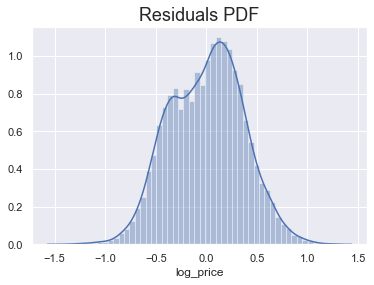

In [52]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [53]:
reg.score(x_train,y_train)

0.35272036570252774

In [54]:
reg.intercept_

12.956171792586458

In [55]:
reg.coef_

array([ 0.0204691 ,  0.06996979, -0.00341318,  0.01627175,  0.03124161,
        0.0738233 ,  0.21172761, -0.08769152])

In [57]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,bedrooms,0.020469
1,bathrooms,0.069970
2,sqft_lot,-0.003413
3,floors,0.016272
4,waterfront,0.031242
5,condition,0.073823
6,sqft_living15,0.211728
7,sqft_lot15,-0.087692


In [58]:
y_hat_test = reg.predict(x_test)

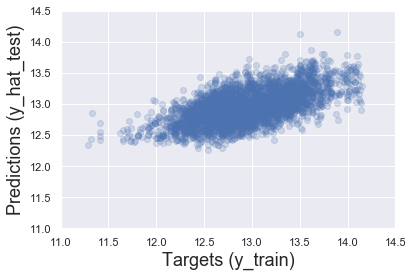

In [59]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(11,14.5)
plt.ylim(11,14.5)


plt.show()

In [61]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_performance['Target'] = np.exp(y_test)
df_performance['Differance'] = df_performance['Target'] - df_performance['Prediction']
df_performance['Differance%'] = np.absolute(df_performance['Differance'] / df_performance['Target'] * 100)
df_performance.head(20)

,Prediction,Target,Differance,Differance%
0,395830.091742,435000.0,39169.908258,9.004577
1,545805.796441,600000.0,54194.203559,9.032367
2,308549.978924,286000.0,-22549.978924,7.884608
3,417337.775264,314500.0,-102837.775264,32.698816
4,355552.555387,355000.0,-552.555387,0.155649
5,524920.963892,327000.0,-197920.963892,60.526289
6,281409.988944,200000.0,-81409.988944,40.704994
7,633157.158089,636230.0,3072.841911,0.482977
8,306452.727867,210000.0,-96452.727867,45.929870
9,657330.714179,665000.0,7669.285821,1.153276


In [63]:
df_performance.describe().round(2)

,Prediction,Target,Differance,Differance%
count,3594.00,3594.0,3594.00,3594.00
mean,440298.08,472368.6,32070.51,31.02
std,125140.37,223236.8,179574.97,26.35
min,209743.62,80000.0,-620298.24,0.00
25%,349945.85,305587.5,-93254.35,12.66
50%,420644.04,425000.0,14888.80,25.44
75%,507439.16,583000.0,121359.11,42.10
max,1408313.66,1393000.0,985116.49,361.20


### Attempt 2

### Checking for Multicollinearity

In [65]:
variables2 = data_cleaned[['year', 'month', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                           'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
                           'sqft_lot15']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif['Features'] = variables2.columns
vif.round(2)

,VIF,Features
0,1416732.38,year
1,5.71,month
2,29.19,bedrooms
3,29.09,bathrooms
4,inf,sqft_living
5,11.65,sqft_lot
6,21.56,floors
7,1.02,waterfront
8,34.34,condition
9,157.40,grade


In [71]:
variables2 = data_cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'lat',
                           'long']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif['Features'] = variables2.columns
vif.round(2)

,VIF,Features
0,28.82,bedrooms
1,24.21,bathrooms
2,28.56,sqft_living
3,5.24,sqft_lot
4,14.10,floors
5,1.01,waterfront
6,134.34,grade
7,120126.58,lat
8,119559.53,long


In [73]:
data_vif2 = data_cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'lat',
                           'long', 'log_price']]
data_vif2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,lat,long,log_price
0,3,1.00,1180,5650,1.0,0,7,47.5112,-122.257,12.309982
1,3,2.25,2570,7242,2.0,0,7,47.7210,-122.319,13.195614
2,2,1.00,770,10000,1.0,0,6,47.7379,-122.233,12.100712
3,4,3.00,1960,5000,1.0,0,7,47.5208,-122.393,13.311329
4,3,2.00,1680,8080,1.0,0,8,47.6168,-122.045,13.142166


### Linear regression model 2

In [74]:
x = data_vif2.drop(['log_price'], axis=1)
y = data_vif2['log_price']

In [76]:
scaler2 = StandardScaler()
scaler2.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
x_scaled = scaler2.transform(x)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=18)

In [79]:
reg2 = LinearRegression()
reg2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_hat = reg2.predict(x_train)

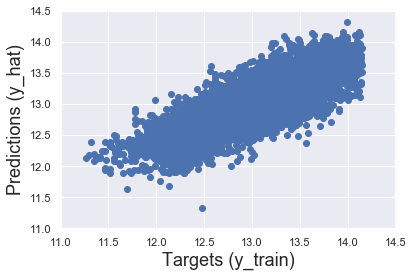

In [81]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(11,14.5)
plt.ylim(11,14.5)


plt.show()

Text(0.5, 1.0, 'Residuals PDF')

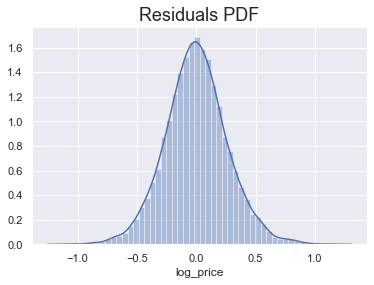

In [82]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [84]:
reg2.score(x_train,y_train)

0.6598460571874538

In [85]:
reg2.intercept_

12.956250565071244

In [86]:
reg2.coef_

array([-0.00917442,  0.00087413,  0.18701266, -0.03345267, -0.01906187,
        0.03383797,  0.14369988,  0.21070572, -0.02441326])

In [87]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg2.coef_
reg_summary

,Features,Weights
0,bedrooms,-0.009174
1,bathrooms,0.000874
2,sqft_living,0.187013
3,sqft_lot,-0.033453
4,floors,-0.019062
5,waterfront,0.033838
6,grade,0.143700
7,lat,0.210706
8,long,-0.024413


In [88]:
y_hat_test = reg2.predict(x_test)

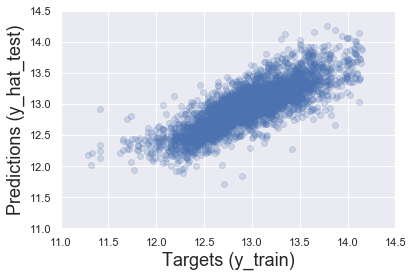

In [89]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(11,14.5)
plt.ylim(11,14.5)


plt.show()

In [90]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_performance['Target'] = np.exp(y_test)
df_performance['Differance'] = df_performance['Target'] - df_performance['Prediction']
df_performance['Differance%'] = np.absolute(df_performance['Differance'] / df_performance['Target'] * 100)
df_performance.head(20)

,Prediction,Target,Differance,Differance%
0,335945.814440,435000.0,99054.185560,22.771077
1,450749.841143,600000.0,149250.158857,24.875026
2,334877.295022,286000.0,-48877.295022,17.089963
3,294129.145631,314500.0,20370.854369,6.477219
4,440381.525287,355000.0,-85381.525287,24.051134
5,279403.678829,327000.0,47596.321171,14.555450
6,263369.798985,200000.0,-63369.798985,31.684899
7,630344.523863,636230.0,5885.476137,0.925055
8,426221.918670,210000.0,-216221.918670,102.962818
9,495034.857741,665000.0,169965.142259,25.558668


In [93]:
df_performance.describe().round(2)

,Prediction,Target,Differance,Differance%
count,3594.00,3594.0,3594.00,3594.00
mean,455415.97,472368.6,16952.62,20.93
std,178844.09,223236.8,141205.36,19.13
min,121131.44,80000.0,-747666.85,0.00
25%,324611.57,305587.5,-61659.98,7.60
50%,429980.50,425000.0,1949.97,16.70
75%,538922.85,583000.0,77181.76,28.25
max,1552554.01,1393000.0,894234.27,349.63
